# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Introducción a la Ciencia de Datos</center>
### <center> Práctica Introducción a Pandas y Visualizaciones</center>

<center>Ejemplos de visualizaciones utilizando el dataset Titanic provisto por Kaggle</center>

Links de interés
 
https://pandas.pydata.org
 
https://matplotlib.org
 
https://seaborn.pydata.org


Importamos todas las librerías que vamos a utilizar

In [ ]:
import numpy as np 
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### <center> Repaso b&aacute;sico de Pandas </center>

Cargamos el archivo de datos en un dataframe de Pandas

In [ ]:
ds_titanic=pd.read_csv('./ds_titanic.csv')

Realizamos una copia del dataset sobre el cual vamos a trabajar para no alterar los datos originales

In [ ]:
ds_trabajo=ds_titanic.copy()

Mostramos las primeras y últimas filas del dataset

In [ ]:
ds_trabajo.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
ds_trabajo.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Listar la cantidad de filas y columnas que tiene el dataset

In [ ]:
ds_trabajo.shape

(891, 12)

Este dataset contiene 891 filas y 12 columnas

Listar los nombres de las columnas del dataset

In [ ]:
ds_trabajo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción de los campos</b><br>
PassengerId: Identificador del pasajero dentro de la tabla<br>
Survived: Indica si el pasajero sobrevivió<br>
Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
Name: Nombre del pasajero <br>
Sex: Sexo del pasajero<br>
Age: Edad<br>
SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
Parch: Cantidad de padres o hijos a bordo<br>
Ticket: Número de ticket<br>
Fate: Tarifa <br>
Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
Embarked: Puerta de embarque<br>

Mostrar el tipo de cada columna del dataframe

In [ ]:
ds_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
ds_trabajo.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Cambiar nombre a una columna

In [ ]:
columnas={"Pclass":"PassengerClass"}
ds_trabajo.rename(columns = columnas, inplace = True)
ds_trabajo.head(2)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Listar la cantidad de datos nulos por columna

In [ ]:
ds_trabajo.isna()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(ds_trabajo.isna().sum())

PassengerId         0
Survived            0
PassengerClass      0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
dtype: int64


Listar la cantidad de datos no nulos por columna

In [ ]:
print(ds_trabajo.count())

PassengerId       891
Survived          891
PassengerClass    891
Name              891
Sex               891
Age               714
SibSp             891
Parch             891
Ticket            891
Fare              891
Cabin             204
Embarked          889
dtype: int64


Analizar algunas combinaciones de variables

In [ ]:
pd.crosstab(ds_trabajo['Survived'],ds_trabajo['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
ds_trabajo.groupby(['PassengerClass','Sex'])['Survived'].sum()

PassengerClass  Sex   
1               female    91
                male      45
2               female    70
                male      17
3               female    72
                male      47
Name: Survived, dtype: int64

Mostrar información de resumen del dataset

In [ ]:
ds_trabajo.describe()

,PassengerId,Survived,PassengerClass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Seleccionar fila por posición

In [ ]:
ds_trabajo.iloc[0]

PassengerId                             1
Survived                                0
PassengerClass                          3
Name              Braund, Mr. Owen Harris
Sex                                  male
Age                                  22.0
SibSp                                   1
Parch                                   0
Ticket                          A/5 21171
Fare                                 7.25
Cabin                                 NaN
Embarked                                S
Name: 0, dtype: object

Seleccionar columna por posición

In [ ]:
ds_trabajo.iloc[:,0]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

##### Seleccionar columna por nombre

In [ ]:
ds_trabajo.loc[:,"PassengerId"]   #ds_trabajo["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [ ]:
ds_trabajo["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

##### Selección de filas en función de características de columnas

In [ ]:
ds_trabajo.loc[:,"Survived"]==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
ds_trabajo["Survived"]==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
ds_trabajo.loc[ds_trabajo.loc[:,"Survived"]==1,:]

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


##### Eliminar columma

In [ ]:
ds_trabajo.drop('PassengerId', axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['Survived',
 'PassengerClass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

##### Eliminar fila por condición

In [ ]:
ds_trabajo_sobrevivientes=ds_trabajo.copy()
ds_trabajo_sobrevivientes.drop(ds_trabajo[ds_trabajo["Survived"]==0].index, axis='index',inplace=True)
ds_trabajo_sobrevivientes.shape

(342, 11)

In [ ]:
ds_trabajo_sobrevivientes=ds_trabajo.copy()
ds_trabajo_sobrevivientes.drop(ds_trabajo.loc[ds_trabajo.loc[:,"Survived"]==0,:].index, axis='index', inplace=True)
ds_trabajo_sobrevivientes.shape

(342, 11)

In [ ]:
ds_trabajo_sobrevivientes.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Cambiar valores de features

In [ ]:
ds_trabajo_reemplazo_valores=ds_trabajo.copy()

ds_trabajo_reemplazo_valores.loc[ds_trabajo_reemplazo_valores.loc[:,"Survived"]==1,"Survived"]="Yes"
ds_trabajo_reemplazo_valores.loc[ds_trabajo_reemplazo_valores.loc[:,"Survived"]==0,"Survived"]="No"

ds_trabajo_reemplazo_valores.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ds_trabajo.loc[:,"Survived"].replace(to_replace=[0,1],value=["No","Yes"],inplace=True)

ds_trabajo.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <center> Análisis exploratorio inicial </center>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### <center> Análisis exploratorio de algunas variables de interés </center> 

### Gráfico de barras

Gráfico de frecuencias para variables cualitativas

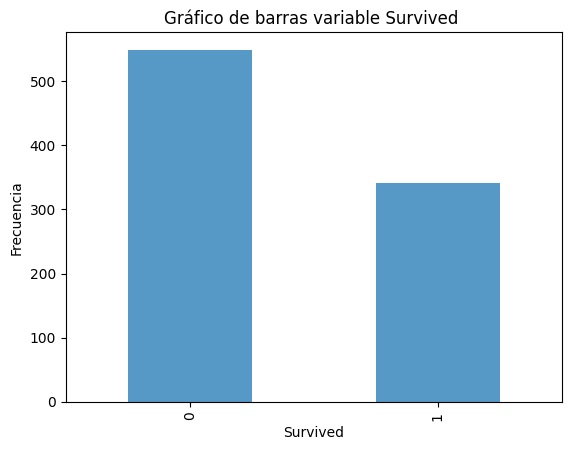

In [ ]:
#Gráfico de barras con Pandas

grf_ds=ds_trabajo['Survived'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable Survived " , xlabel="Survived" , ylabel="Frecuencia")

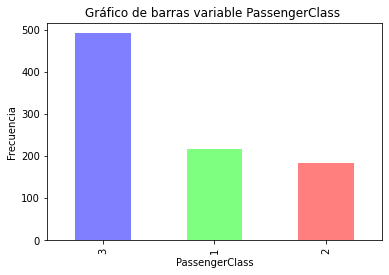

In [ ]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
grf=ds_trabajo['PassengerClass'].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable PassengerClass ", xlabel="PassengerClass",ylabel="Frecuencia") 
#plot(kind="bar",alpha=0.5,color=colores)

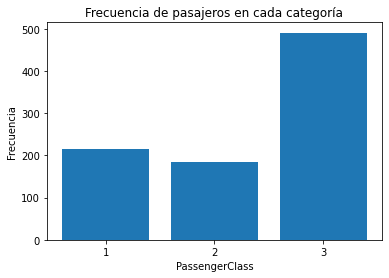

In [ ]:
#Gráfico de barras con Matplotlib
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

ds_agrupado_Pclass

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y) ## Creamos Gráfica

plt.ylabel('Frecuencia') # Leyenda en el eje y
plt.xlabel('PassengerClass') # Leyenda en el eje x 
plt.title('Frecuencia de pasajeros en cada categoría') ## Título de Gráfica
 
plt.show() ## Mostramos Gráfica

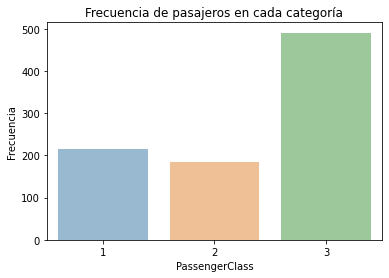

In [ ]:
#Gráfico de barras con Seaborn
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5).set(title="Frecuencia de pasajeros en cada categoría",ylabel='Frecuencia',xlabel='PassengerClass')

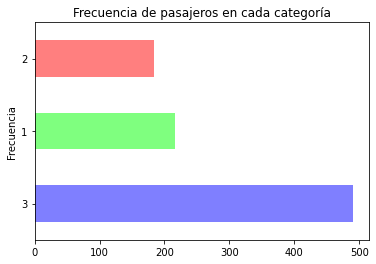

In [ ]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
grf=ds_trabajo['PassengerClass'].value_counts().plot.barh(alpha=0.5,color=colores, title="Frecuencia de pasajeros en cada categoría",xlabel='Frecuencia',ylabel='PassengerClass')  
#plot(kind="barh",alpha=0.5,color=colores)

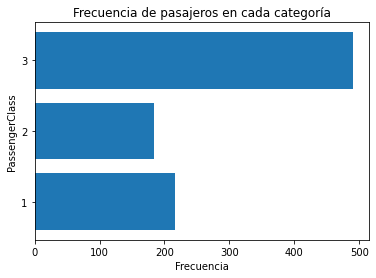

In [ ]:
#MatplotLib
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

plt.locator_params('y', nbins=3)
plt.barh(eje_x, eje_y) ## Creamos Gráfico

plt.ylabel('PassengerClass') ## Leyenda en el eje y
plt.xlabel('Frecuencia') ## Leyenda en el eje x 
plt.title('Frecuencia de pasajeros en cada categoría') ## Título de Gráfica
 
plt.show() ## Mostramos Gráfico

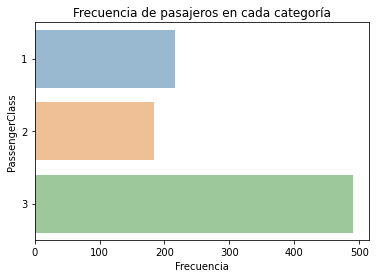

In [ ]:
#Seaborn
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

eje_y = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_x = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5, orient="h").set(title="Frecuencia de pasajeros en cada categoría",xlabel='Frecuencia',ylabel='PassengerClass')

### Histogramas

Gráfico de frecuencias para variables cuantitativas (en caso de variables cuantitativas se utiliza un gráfico de barras)

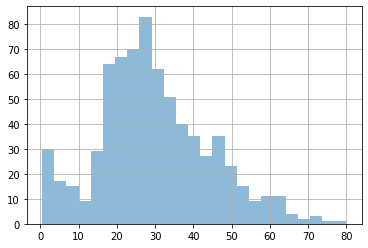

In [ ]:
# Histogramas con Pandas

grf=ds_trabajo['Age'].hist(alpha=0.5,bins=25)

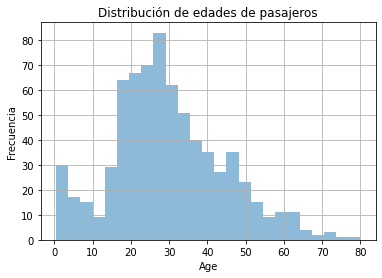

In [ ]:
# Histogramas con matplotlib

plt.title('Distribución de edades de pasajeros')
plt.hist(ds_trabajo['Age'], bins = 25 , alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

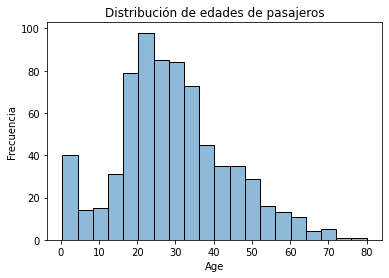

In [ ]:
#Histogramas con Seaborn
sns_hist=sns.histplot(data=ds_trabajo['Age'], alpha = 0.5).set(title="Distribución de edades de pasajeros",xlabel="Age",ylabel="Frecuencia")

### Gráficos de densidad

Representación de la distribución de una variables <br>
(Histograma suavizado)

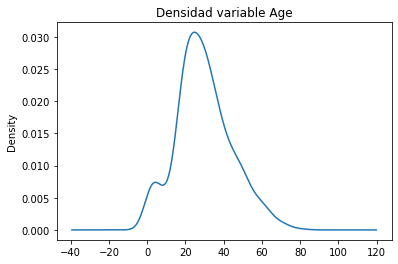

In [ ]:
# Gráficos de densidad con Pandas
grf=ds_trabajo['Age'].plot.kde(title="Densidad variable Age",xlabel="Age",ylabel="Densidad")

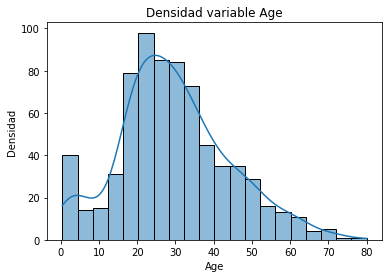

In [ ]:
# Gráficos de densidad con Seaborn
sns_hist=sns.histplot(data=ds_trabajo['Age'], kde=True, alpha = 0.5).set(title="Densidad variable Age",xlabel="Age",ylabel="Densidad")

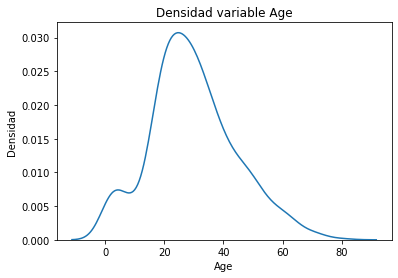

In [ ]:
# Gráficos de densidad con Seaborn
sns_hist=sns.kdeplot(data=ds_trabajo['Age']).set(title="Densidad variable Age",xlabel="Age",ylabel="Densidad")

### Boxplots

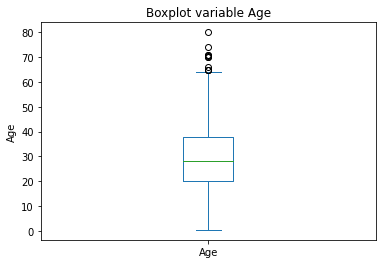

In [ ]:
# Boxplots con Pandas
grf=ds_trabajo['Age'].plot.box(title="Boxplot variable Age",xlabel=" ",ylabel="Age")

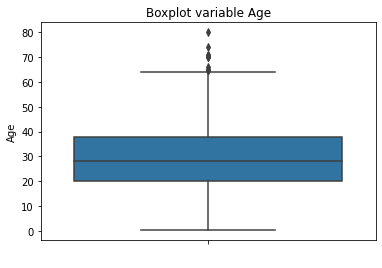

In [ ]:
# Boxplots con Seaborn
grf=sns.boxplot(y="Age", data=ds_trabajo).set(title="Boxplot variable Age",xlabel=" ",ylabel="Age")

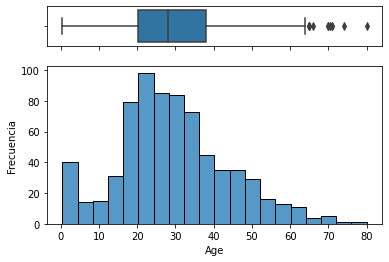

In [ ]:
 
# Creamos una figura compuesta de otras dos figuras
f, (boxplot, hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)})
 
# Creamos histograma
sns.histplot(data=ds_trabajo['Age'], ax=hist).set(xlabel='Age',ylabel='Frecuencia')
#Creamos boxplot
sns.boxplot(ds_trabajo['Age'], ax=boxplot).set(xlabel="Age",ylabel="")

boxplot.set(xlabel='')
plt.show()

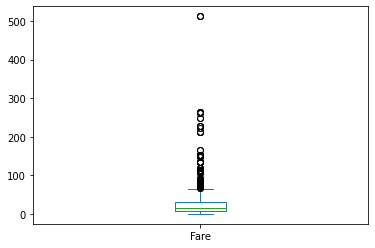

In [ ]:
ds_trabajo['Fare'].plot.box()

In [ ]:
ds_trabajo.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


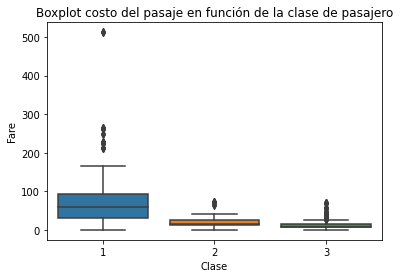

In [ ]:
#Boxplots con Seaborn
sns_boxplot_fare_pclass=sns.boxplot(x="PassengerClass",y="Fare", data=ds_trabajo).set(title="Boxplot costo del pasaje en función de la clase de pasajero",xlabel='Clase',ylabel='Fare')

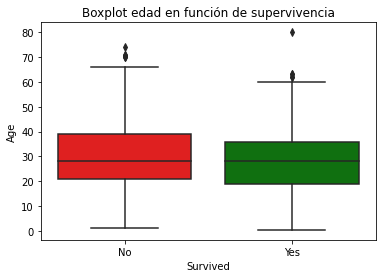

In [ ]:
#Boxplots con Seaborn
grf=sns.boxplot(x="Survived",y="Age", data=ds_trabajo, palette=["r", "g"]).set(title="Boxplot edad en función de supervivencia",xlabel='Survived',ylabel='Age')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


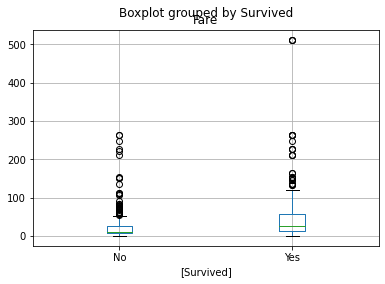

In [ ]:
#Boxplots con Pandas
grf=ds_trabajo[["Survived","Fare"]].boxplot(by="Survived")

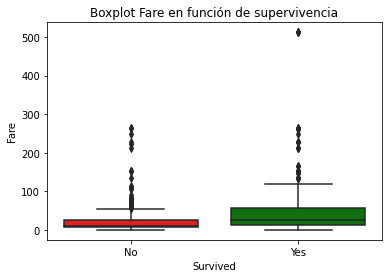

In [ ]:
#Boxplots con Seaborn
sns_boxplot_fare_pclass=sns.boxplot(x="Survived",y="Fare", data=ds_trabajo, palette=["r", "g"]).set(title="Boxplot Fare en función de supervivencia",xlabel='Survived',ylabel='Fare')

### Gráficos de a pares

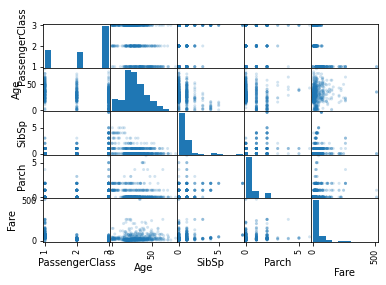

In [ ]:
#Gráficos de a pares de variables con Pandas

from pandas.plotting import scatter_matrix

columns=ds_trabajo.columns.tolist()
columns.remove('Survived')
ds_scatter_matrix=ds_trabajo[columns].copy()
scatter_matrix(ds_scatter_matrix, alpha=0.2);

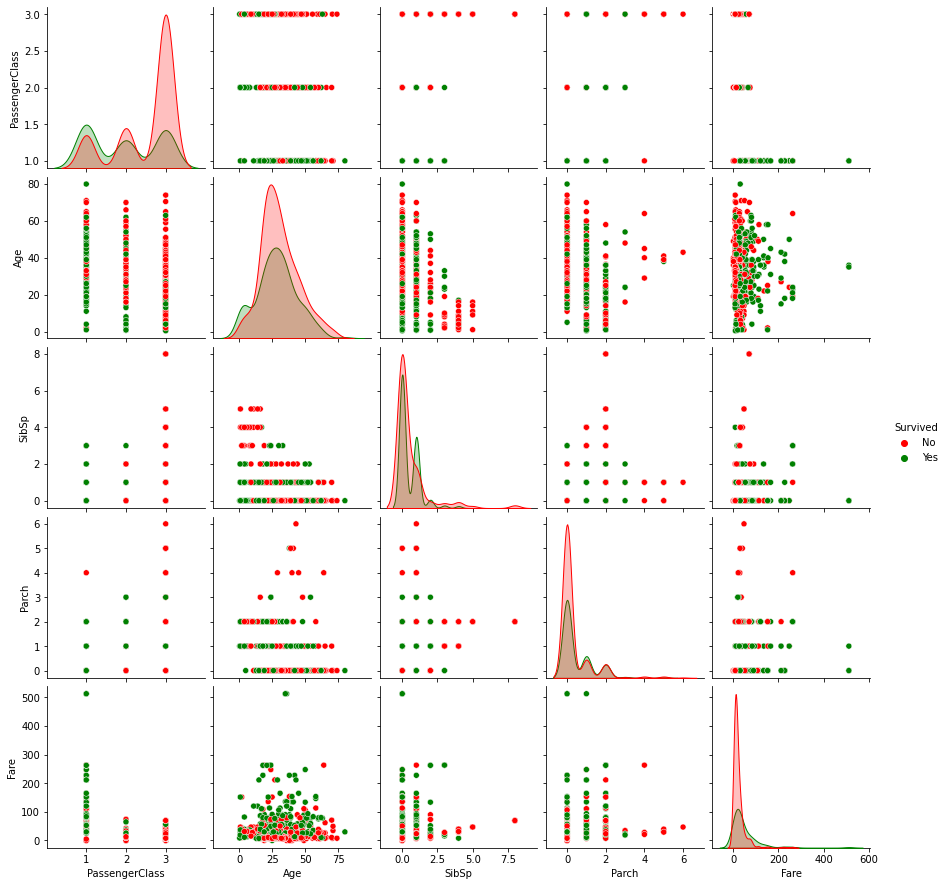

In [ ]:
#Gráficos de a pares de variables con Seaborn
columns=ds_trabajo.columns.tolist()
#columns.remove('PassengerId')
ds_pariplot=ds_trabajo[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pariplot, hue="Survived", palette=["r", "g"])

### Dispersogramas

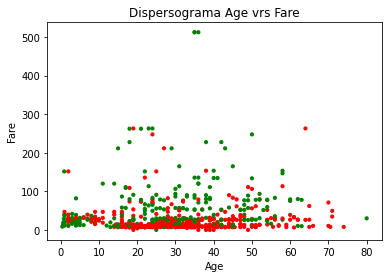

In [ ]:
#Dispersograma con Pandas
#ds_trabajo.plot.scatter(x="Age", y="Fare", c="Survived", cmap="viridis", s=50);

col = ds_trabajo.Survived.map({"No":'r', "Yes":'g'})

grf=ds_trabajo.plot.scatter(x="Age", y="Fare", c=col, s=10).set(title="Dispersograma Age vrs Fare",xlabel='Age',ylabel='Fare') 
#c=color s=size

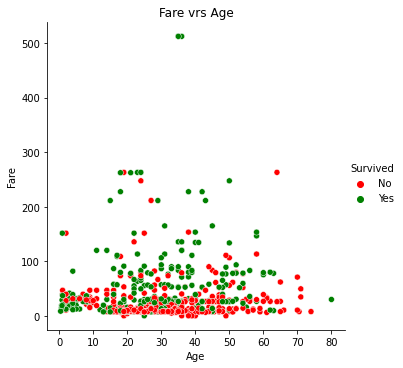

In [ ]:
#Dispersograma con Seaborn
graf_relplot=sns.relplot(data=ds_trabajo,x="Age", y="Fare", hue="Survived",palette=["r", "g"]).set(title="Fare vrs Age",xlabel='Age',ylabel='Fare')

#### Gráfico de violín

###### Muestra la distribución de una variable cuantitativa condicionada a distintos valores de una variable categórica, de forma que las distribuciones pueden ser comparadas de forma visual rápidamente.

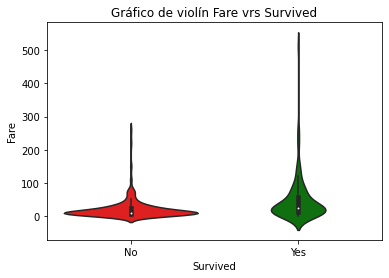

In [ ]:
#Gráfico de violín Seaborn
ax = sns.violinplot(x="Survived", y="Fare", data=ds_trabajo,palette=["r", "g"]).set(title="Gráfico de violín Fare vrs Survived",xlabel='Survived',ylabel='Fare') 

#### Heatmap

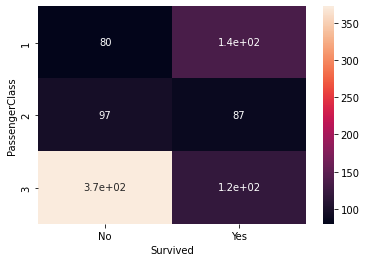

In [ ]:
tabla=pd.crosstab(ds_trabajo['PassengerClass'], ds_trabajo['Survived'])

grf=sns.heatmap(tabla,annot=True)

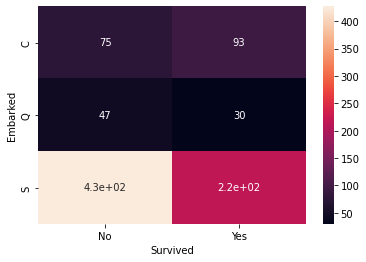

In [ ]:
tabla=pd.crosstab(ds_trabajo['Embarked'], ds_trabajo['Survived'])

grf=sns.heatmap(tabla,annot=True)

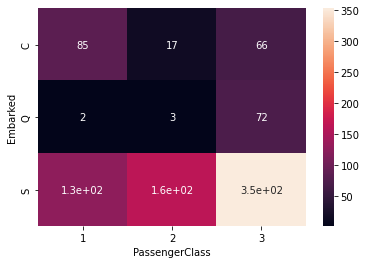

In [ ]:
tabla=pd.crosstab(ds_trabajo['Embarked'], ds_trabajo['PassengerClass'])

grf=sns.heatmap(tabla,annot=True)